In [54]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
# from keras.layers import Dense, Dropout, Activation, LSTM, Convolution1D, MaxPooling1D, Flatten
# from keras.models import Sequential
import matplotlib.pyplot as plt

%matplotlib inline
from torchbearer import Trial
import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
import torch
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchbearer
from torch import nn
from torch import optim
from torch.utils.data import DataLoader, TensorDataset, Dataset
from torchvision.datasets import MNIST
from torchbearer import Trial
import torchvision.transforms as transforms

In [56]:
datapath = os.path.join(os.getcwd(), 'data')
datapath

'C:\\Users\\王隽文\\Desktop\\MSc-dissertation\\data'

In [57]:
df = pd.read_csv(os.path.join(datapath,'Integrated Data.csv'), engine='python')
df.tail()

,Date,Adj Close,Volume,2-days Net change,5day-moving average,5day- standard deviation,10-day moving average,10day- standard deviation,30-day moving average,30day- standard deviation,^VIX,^TNX
3016,2016/12/23,2263.790039,2020550000,2.830078,2264.643994,3.757096,2262.528003,5.773423,2185.648188,54.155056,11.44,2.543
3017,2016/12/27,2268.879883,1987080000,5.089844,2265.913965,3.932965,2263.719995,5.726416,2188.366187,54.863455,11.99,2.563
3018,2016/12/28,2249.919922,2392360000,-18.959961,2261.745947,7.199588,2261.539990,6.446745,2190.834585,54.799583,12.95,2.506
3019,2016/12/29,2249.260010,2336370000,-0.659912,2258.561963,8.671128,2261.137988,7.110240,2193.027783,54.901540,13.37,2.477
3020,2016/12/30,2238.830078,2670900000,-10.429932,2254.135986,12.107894,2258.817993,9.989011,2194.918584,54.816670,14.04,2.446


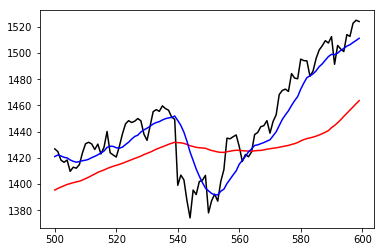

In [58]:
plt.plot(df['Adj Close'][500:600], color='k')
plt.plot(df['30-day moving average'][500:600],color='r')
plt.plot(df['10-day moving average'][500:600],color='b')

In [59]:
# initialising
df['forecasting_nextday'] = df['Adj Close'].shift(-1)
df['forecasting_10daysout'] = df['Adj Close'].shift(-10)
df['forecasting_20daysout'] = df['Adj Close'].shift(-20)
df['forecasting_30daysout'] = df['Adj Close'].shift(-30)
    
df = df.dropna(axis=0)


df

,Date,Adj Close,Volume,2-days Net change,5day-moving average,5day- standard deviation,10-day moving average,10day- standard deviation,30-day moving average,30day- standard deviation,^VIX,^TNX,forecasting_nextday,forecasting_10daysout,forecasting_20daysout,forecasting_30daysout
29,2005/2/14,1206.140015,1290180000,0.839966,1200.548023,5.972420,1197.998010,6.471962,1186.938000,11.779314,11.520000,4.073,1210.119995,1210.410034,1197.750000,1181.410034
30,2005/2/15,1210.119995,1527080000,3.979980,1202.112012,7.399357,1200.069006,6.727023,1187.206002,12.218959,11.270000,4.098,1210.339966,1210.079956,1188.069946,1180.589966
31,2005/2/16,1210.339966,1490100000,0.219971,1205.782007,5.406050,1201.784009,6.960478,1187.948999,12.929107,11.100000,4.158,1200.750000,1210.469971,1190.209961,1172.920044
32,2005/2/17,1200.750000,1580120000,-9.589966,1206.530005,3.952125,1202.870007,5.615875,1188.515999,13.109877,11.770000,4.185,1201.589966,1222.119995,1189.650024,1176.119995
33,2005/2/18,1201.589966,1551200000,0.839966,1205.787988,4.544651,1202.726001,5.629762,1188.972664,13.324178,11.180000,4.260,1184.160034,1225.310059,1183.780029,1181.390015
34,2005/2/22,1184.160034,1744940000,-17.429932,1201.391992,10.649366,1200.970007,8.152000,1188.905001,13.343937,13.140000,4.285,1190.800049,1219.430054,1171.709961,1184.069946
35,2005/2/23,1190.800049,1501090000,6.640015,1197.528003,10.185715,1199.820007,8.733905,1188.923336,13.346226,12.390000,4.268,1200.199951,1207.010010,1172.530029,1191.140015
36,2005/2/24,1200.199951,1518750000,9.399902,1195.500000,7.704286,1200.641004,8.290723,1189.497001,13.451850,11.570000,4.281,1211.369995,1209.250000,1171.420044,1181.199951
37,2005/2/25,1211.369995,1523680000,11.170044,1197.623999,10.478090,1202.077002,8.818736,1190.286003,14.024779,11.490000,4.272,1203.599976,1200.079956,1174.280029,1181.209961
38,2005/2/28,1203.599976,1795480000,-7.770019,1198.026001,10.704402,1201.906995,8.765928,1191.157670,14.012115,12.080000,4.359,1210.410034,1206.829956,1165.359985,1187.760010


In [60]:
print(len(df))
X = df.values[:,1:12]
y = df.values[:,-4] # 1_days ahead forecasting
print(X.shape, y.shape)

2958
(2958, 11) (2958,)


In [61]:
from train_test_split import utility_fun

# decide to use which model
flag = '1dconv'

In [62]:
temp = utility_fun([X, y], len_of_trainset = 2000, time_interval = 50, batch_size=64)

temp.norm('regressor')
temp.sepera_time_step()
temp.test_train_split()
trainloader, testloader, validateData, target, trainData, testData = temp.build_dataloader(flag)
print(validateData.shape, trainData.shape, testData.shape)

regressor
torch.Size([909, 1, 50, 11]) torch.Size([2000, 1, 50, 11]) torch.Size([2000, 1])


In [63]:
class BaselineModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(BaselineModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = F.relu(out)        
        out = self.fc2(out)
#         out = F.sigmoid(out)
#         out = F.relu(out)
        return out

In [64]:
class Net(nn.Module):  
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 64, kernel_size = (15, 11), padding=0)
        self.conv2 = nn.Conv2d(64, 32, kernel_size = (15, 1), padding=0)
        self.fc1 = nn.Linear(512 , 1)
        
        
    def forward(self,x):
        out = self.conv1(x)
        out = F.max_pool2d(out, kernel_size = (4, 1), stride=(1, 1))
        out = F.dropout(out, 0.2)
        out = self.conv2(out)
        out = F.max_pool2d(out, kernel_size = (4, 1), stride=(1, 1))
        out = out.view(out.shape[0], -1)
        out = self.fc1(out)
#         out = F.sigmoid(out)
        return out

    
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Net().to(device)


# summary(your_model, input_size=(channels, H, W))
# summary(model,(1, 50, 11))
# print(model)

In [65]:
class LSTM(nn.Module):

    def __init__(self, input_dim, hidden_dim, batch_size, output_dim=1,
                    num_layers=1):
        super(LSTM, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.batch_size = batch_size
        self.num_layers = num_layers

        # Define the LSTM layer
        self.lstm = nn.LSTM(self.input_dim, self.hidden_dim, self.num_layers, dropout = 0.2)

        # Define the output layer
        self.linear = nn.Linear(self.hidden_dim, output_dim)

    def init_hidden(self):
        # This is what we'll initialise our hidden state as
        return (torch.zeros(self.num_layers, self.batch_size, self.hidden_dim),
                torch.zeros(self.num_layers, self.batch_size, self.hidden_dim))

    def forward(self, x):
        # Forward pass through LSTM layer
        # shape of lstm_out: [input_size, batch_size, hidden_dim]
        # shape of self.hidden: (a, b), where a and b both 
        # have shape (num_layers, batch_size, hidden_dim).
#         print(x.shape)
        lstm_out, self.hidden = self.lstm(x.view(1, self.batch_size, -1))
        
        # Only take the output from the final timetep
        # Can pass on the entirety of lstm_out to the next layer if it is a seq2seq prediction
        y_pred = self.linear(lstm_out[-1].view(self.batch_size, -1))
#         out = F.sigmoid(y_pred.view(-1))
#         print(out)
        out = y_pred
        return out

    
lstm_input_size = 550
num_train = 1
output_dim = 1
num_layers = 1
h1 = 500

device = 'cpu'
model = LSTM(lstm_input_size, h1, batch_size=num_train, output_dim=output_dim, num_layers=num_layers).to(device)

print(model)

E:\anacoda\lib\site-packages\torch\nn\modules\rnn.py:54: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


LSTM(
  (lstm): LSTM(550, 500, dropout=0.2)
  (linear): Linear(in_features=500, out_features=1, bias=True)
)


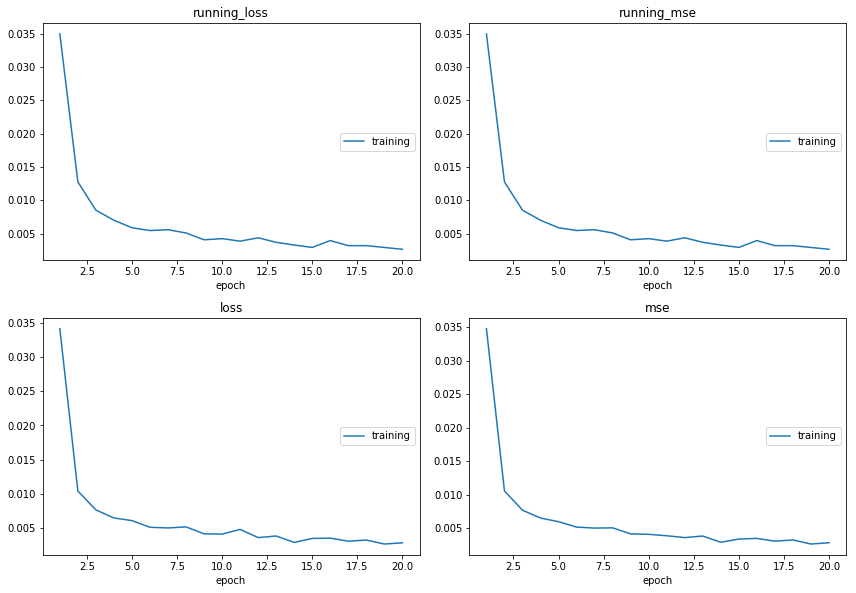

[{'running_loss': 0.03498987853527069,
  'running_mse': 0.03498987480998039,
  'loss': 0.034161362797021866,
  'mse': 0.03477777540683746,
  'train_steps': 32,
  'validation_steps': None},
 {'running_loss': 0.012761171907186508,
  'running_mse': 0.012761171907186508,
  'loss': 0.01040775328874588,
  'mse': 0.0105900838971138,
  'train_steps': 32,
  'validation_steps': None},
 {'running_loss': 0.008507742546498775,
  'running_mse': 0.008507742546498775,
  'loss': 0.007646649144589901,
  'mse': 0.007715657819062471,
  'train_steps': 32,
  'validation_steps': None},
 {'running_loss': 0.006996842101216316,
  'running_mse': 0.006996842101216316,
  'loss': 0.006465206388384104,
  'mse': 0.0065469397231936455,
  'train_steps': 32,
  'validation_steps': None},
 {'running_loss': 0.005868925713002682,
  'running_mse': 0.005868926644325256,
  'loss': 0.00608059810474515,
  'mse': 0.006001012399792671,
  'train_steps': 32,
  'validation_steps': None},
 {'running_loss': 0.005454856436699629,
  'run

In [66]:
from torchbearer.callbacks import LiveLossPlot

device = "cuda:0" if torch.cuda.is_available() else "cpu"
print(device, flag)


if flag == 'mlp':
    model = BaselineModel(50*11, 220, 1)
if flag == '1dconv':
    model = Net()
if flag == 'lstm':
    model = LSTM(lstm_input_size, h1, batch_size=num_train, output_dim=output_dim, num_layers=num_layers).to(device)
    
    
# define the loss function and the optimiser
loss_function = nn.MSELoss()

#classification problem  we use bce loss
# loss_function = nn.BCELoss()
optimiser = optim.Adam(model.parameters())
callbacks = [LiveLossPlot(skip_first=0, fig_path="livelossplot.png")]


trial = Trial(model, optimiser, loss_function, metrics=['loss', 'accuracy'], callbacks=callbacks).to(device)
# trial.with_generators(trainloader, test_generator=validateData.view(len(validateData), -1))
trial.with_generators(trainloader, test_generator=testloader)
trial.run(epochs=20)
# results = trial.evaluate(data_key=torchbearer.TEST_DATA)

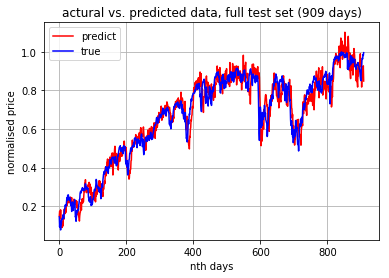

In [67]:
# y_pred= model(validateData.view(909,-1).cuda().float())
y_pred= model(validateData.cuda().float())
y_pred.shape

plt.plot(y_pred.cpu().detach().numpy(), 'r-',label='predict')
plt.plot(target.cpu().numpy(), 'b-',label='true')
plt.legend()
plt.grid()
plt.xlabel('nth days')
plt.ylabel('normalised price')
plt.title('actural vs. predicted data, full test set (909 days)')
plt.show()

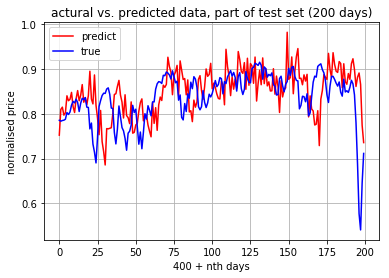

In [68]:
plt.plot(y_pred.cpu().detach().numpy()[400:600], 'r-',label='predict')
plt.plot(target.cpu().numpy()[400:600], 'b-',label='true')
plt.legend()
plt.grid()
plt.xlabel('400 + nth days')
plt.ylabel('normalised price')
plt.title('actural vs. predicted data, part of test set (200 days)')
plt.show()

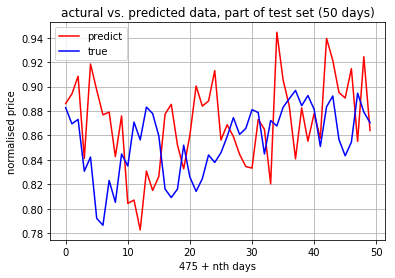

In [69]:
plt.plot(y_pred.cpu().detach().numpy()[475:525], 'r-',label='predict')
plt.plot(target.cpu().numpy()[475:525], 'b-',label='true')
plt.legend()
plt.grid()
plt.xlabel('475 + nth days')
plt.ylabel('normalised price')
plt.title('actural vs. predicted data, part of test set (50 days)')
plt.show()

In [70]:
your_file = open(flag+'_result_regressor.csv', 'ab')
np.savetxt(your_file, y_pred.cpu().detach().numpy())
your_file.close()